In [1]:
#Descargamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Leemos los archivos, asignandoles los nombres a las columnas
df1=pd.read_csv('sargento_201117.csv', skiprows=2, sep=',', header= None ,
                names=['#','Fecha','AbsPres','Temp','WaterLevel'] )
df2=pd.read_csv('sargento_salinidad_201117.csv', skiprows=3, sep=',', header= None ,
               names= ['#','Fecha','CondHighRng','Temp','SpecificConductance','Salinity'])

In [3]:
#Eliminamos la fila extra, para que los dos data frames tengan la misma cantidad de datos
df1=df1[:-1]
df1=df1.drop(['#'],1)
df2=df2.drop(['#'],1)

In [4]:
#Convertimos las columnas a formato de fecha
df1['Fecha'] = pd.to_datetime(df1['Fecha'],  format='%m/%d/%Y %H:%M:%S')
df1['Mes'] = df1['Fecha'].dt.month
df2['Fecha'] = pd.to_datetime(df2['Fecha'],  format='%m/%d/%Y %H:%M:%S')
df2['Mes'] = df2['Fecha'].dt.month

In [5]:
df1.reset_index()
df1.head()

,Fecha,AbsPres,Temp,WaterLevel,Mes
0,2017-10-26 13:00:00,105.612,24.448,-0.150,10
1,2017-10-26 13:15:00,105.513,24.351,-0.160,10
2,2017-10-26 13:30:00,105.433,24.351,-0.168,10
3,2017-10-26 13:45:00,105.385,24.351,-0.173,10
4,2017-10-26 14:00:00,105.321,24.351,-0.179,10


In [6]:
df2.reset_index()
df2.head()

,Fecha,CondHighRng,Temp,SpecificConductance,Salinity,Mes
0,2017-10-26 13:00:00,54525.5,24.91,54622.1,36.1588,10
1,2017-10-26 13:15:00,54525.5,24.82,54719.0,36.2311,10
2,2017-10-26 13:30:00,54525.5,24.76,54783.8,36.2794,10
3,2017-10-26 13:45:00,54525.5,24.75,54794.6,36.2875,10
4,2017-10-26 14:00:00,54525.5,24.73,54816.2,36.3036,10


In [7]:
df1.dtypes

Fecha         datetime64[ns]
AbsPres              float64
Temp                 float64
WaterLevel           float64
Mes                    int64
dtype: object

In [8]:
df2.dtypes

Fecha                  datetime64[ns]
CondHighRng                   float64
Temp                          float64
SpecificConductance           float64
Salinity                      float64
Mes                             int64
dtype: object

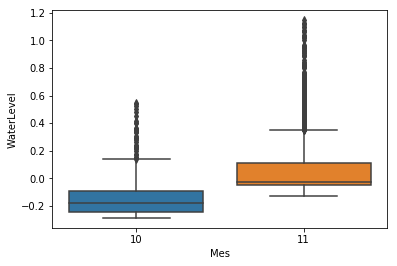

In [9]:
#Boxplot de Nivel del Mar por mes
import seaborn as sns
ax = sns.boxplot(x='Mes',y="WaterLevel", data=df1)
plt.show()

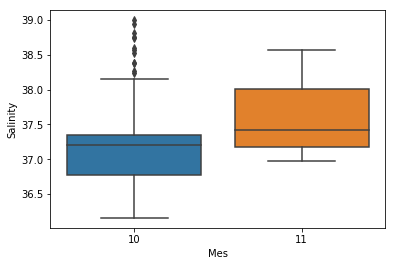

In [10]:
#Boxplot de Salinidad por mes
import seaborn as sns
ax = sns.boxplot(x='Mes',y="Salinity", data=df2)
plt.show()

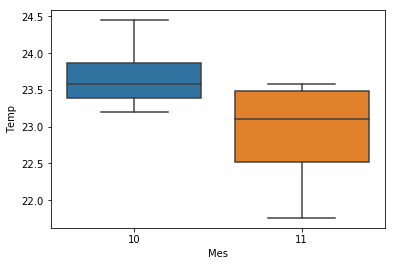

In [11]:
#Boxplot de Temperatura por mes
import seaborn as sns
ax = sns.boxplot(x='Mes',y="Temp", data=df1)
plt.show()

In [12]:
df1.describe()

,AbsPres,Temp,WaterLevel,Mes
count,2394.000000,2394.000000,2394.000000,2394.000000
mean,107.430007,23.120883,0.030863,10.781119
std,2.371844,0.563555,0.235974,0.413574
min,104.229000,21.760000,-0.288000,10.000000
25%,106.407000,22.525000,-0.071000,11.000000
50%,106.764000,23.388000,-0.035000,11.000000
75%,107.305000,23.484000,0.018750,11.000000
max,118.641000,24.448000,1.146000,11.000000


In [13]:
df2.describe()

,CondHighRng,Temp,SpecificConductance,Salinity,Mes
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,54524.972807,23.316646,56386.831662,37.479737,10.781119
std,11.876669,0.547033,619.501987,0.464974,0.413574
min,54105.700000,21.490000,54622.100000,36.158800,10.000000
25%,54525.500000,22.730000,55949.700000,37.151400,11.000000
50%,54525.500000,23.490000,56185.600000,37.328300,11.000000
75%,54525.500000,23.700000,57053.700000,37.980300,11.000000
max,54525.500000,24.910000,58398.700000,38.994200,11.000000


In [14]:
#Nuevo data frame con WaterLevel y Salinity en uno solo
df3=pd.DataFrame()
df3['WaterLevel']=df1['WaterLevel']
df3['Salinity']=df2['Salinity']

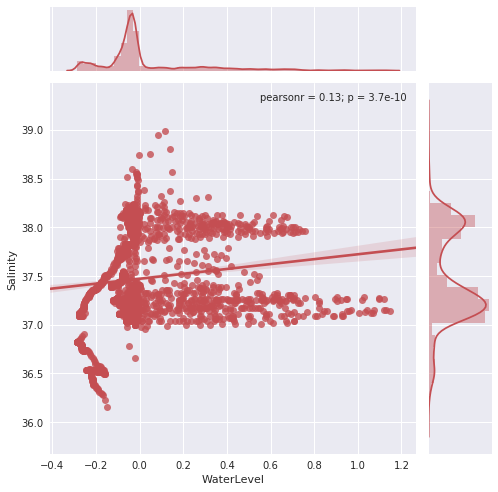

In [15]:
#Gráfica de Pearson de Nivel del Agua y Salinidad
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("WaterLevel", "Salinity", data=df3, kind="reg", color="r", size=7)
plt.show(g)

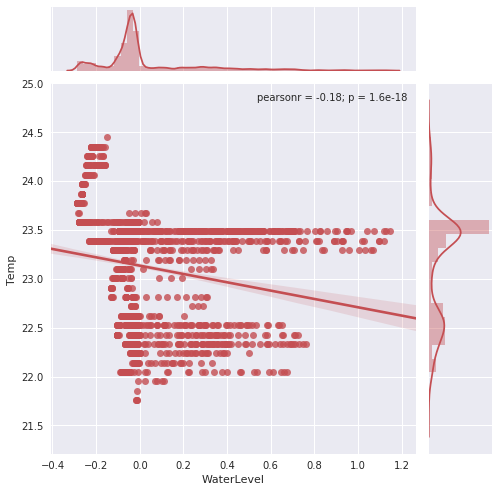

In [16]:
#Gráfica de Pearson de Nivel del Agua y Temperatura
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("WaterLevel", "Temp", data=df1, kind="reg", color="r", size=7)
plt.show(g)

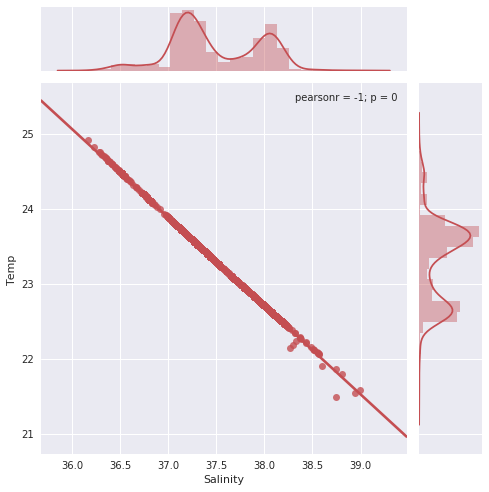

In [17]:
#Gráfica de Pearson de Salinidad y Temperatura
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Salinity", "Temp", data=df2, kind="reg", color="r", size=7)
plt.show(g)

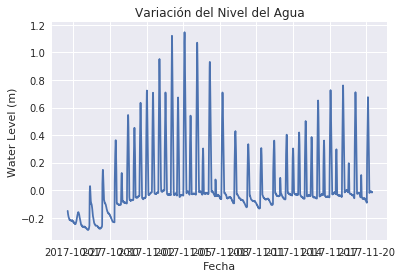

In [18]:
#Gráfica de Nivel del Agua en función del tiempo
plt.plot_date(x=df1.Fecha, y=df1.WaterLevel, fmt="b-")
plt.title("Variación del Nivel del Agua")
plt.ylabel("Water Level (m)")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

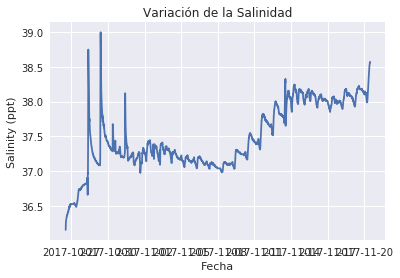

In [19]:
#Gráfica de Salinidad en función del tiempo
plt.plot_date(x=df2.Fecha, y=df2.Salinity, fmt="b-")
plt.title("Variación de la Salinidad")
plt.ylabel("Salinity (ppt)")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

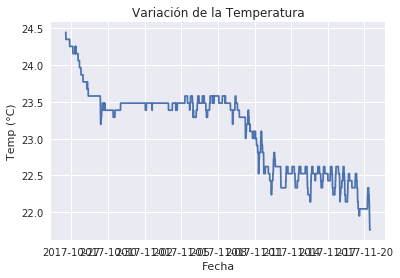

In [20]:
#Gráfica de Temperatura en función del tiempo
plt.plot_date(x=df1.Fecha, y=df1.Temp, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp (°C)")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

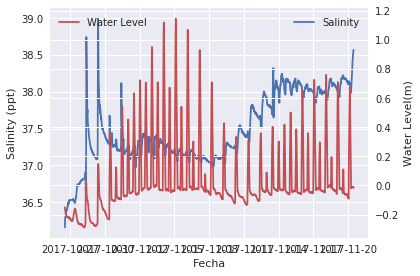

In [21]:
#Grafica de doble eje Salinidad y nivel del mar
fig, ax1 = plt.subplots()
x=df1['Fecha']
y1=df3.Salinity
y2=df3.WaterLevel
ax1.plot(x,y1,'b-', label='Salinity')
plt.legend(loc='upper right')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Salinity (ppt)')
ax2 = ax1.twinx()
ax2.plot(x, y2 , 'xr-', label='Water Level') 
plt.legend(loc='upper left')
ax2.set_ylabel('Water Level(m)')
fig.tight_layout()
plt.show()

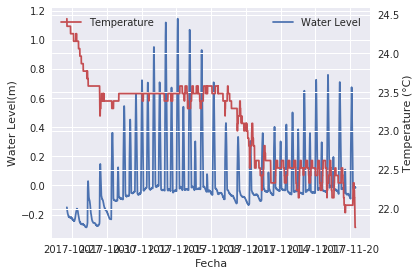

In [22]:
#Grafica de doble eje Nivel del Agua y Temperatura
fig, ax1 = plt.subplots()
x=df1['Fecha']
y1=df1.WaterLevel
y2=df1.Temp
ax1.plot(x,y1,'b-', label='Water Level')
plt.legend(loc='upper right')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Water Level(m)')
ax2 = ax1.twinx()
ax2.plot(x, y2 , 'xr-', label='Temperature') 
plt.legend(loc='upper left')
ax2.set_ylabel('Temperature (°C)')
fig.tight_layout()
plt.show()

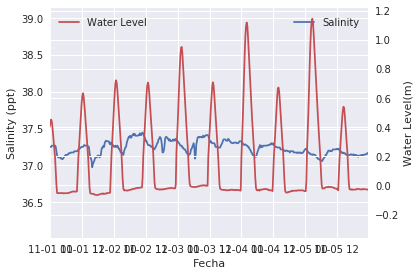

In [23]:
#Grafica de doble eje Salinidad y nivel del mar (1 Nov 2017 - 5 Nov 2017)
fig, ax1 = plt.subplots()
x=df1['Fecha']
y1=df3.Salinity
y2=df3.WaterLevel
ax1.plot(x,y1,'b-', label='Salinity')
plt.legend(loc='upper right')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Salinity (ppt)')
ax2 = ax1.twinx()
ax2.plot(x, y2 , 'xr-', label='Water Level') 
plt.legend(loc='upper left')
ax2.set_ylabel('Water Level(m)')
fig.tight_layout()
plt.xlim('2017-11-01 00:00:00','2017-11-05 23:45:00')
plt.show()

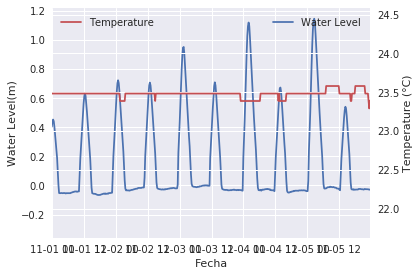

In [24]:
#Grafica de doble eje Nivel del Agua y Temperatura (1 Nov 2017 - 5 Nov 2017)
fig, ax1 = plt.subplots()
x=df1['Fecha']
y1=df1.WaterLevel
y2=df1.Temp
ax1.plot(x,y1,'b-', label='Water Level')
plt.legend(loc='upper right')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Water Level(m)')
ax2 = ax1.twinx()
ax2.plot(x, y2 , 'xr-', label='Temperature') 
plt.legend(loc='upper left')
ax2.set_ylabel('Temperature (°C)')
fig.tight_layout()
plt.xlim('2017-11-01 00:00:00','2017-11-05 23:45:00')
plt.show()